<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы-+-Чек-лист-готовности-проекта" data-toc-modified-id="Общие-выводы-+-Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы + Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Ниже предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импорт необходимых для работы библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:/Users/Nshan/Desktop/Отток клиентов из банка/Churn.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.shape

(10000, 14)

In [6]:
data.columns.str.lower()

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

**Проверка на пропуски и дубликаты**

In [8]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [9]:
data['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [10]:
data[data['tenure'].isna()].head(20)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Поскольку среди многих пропусков в столбце со сроком пользования банковскими услугами также присутствуют пропуски в столбце с балансом, можно предположить, что клиенты новые, но система их пока не успела отобразить это в данных. Поскольку данное суждение не является абсолютно точным, то для повышения качества модели заменим пропуски на медианное значение.

In [11]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [12]:
data.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [14]:
data['surname'] = data['surname'].str.lower()
data['geography'] = data['geography'].str.lower()
data['gender'] = data['gender'].str.lower()

In [15]:
data.duplicated().sum()

0

Для поиска дубликатов все значения таблицы были приведены к нижнему регистру. Дубликатов не обнаружен. 

In [16]:
data.query('exited == 1').count()

row_number          2037
customer_id         2037
surname             2037
credit_score        2037
geography           2037
gender              2037
age                 2037
tenure              2037
balance             2037
num_of_products     2037
has_cr_card         2037
is_active_member    2037
estimated_salary    2037
exited              2037
dtype: int64

Для дальнейшего построения моделей необходимо преобразовать категориальные столбцы в числовые. Поскольку разные значения одного столбца имеют одинаковое значение, то для преобразования признаков воспользуемся техникой ohe.

In [17]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


In [18]:
data['geography'].value_counts()

france     5014
germany    2509
spain      2477
Name: geography, dtype: int64

In [19]:
data['surname'].value_counts()

smith       32
scott       29
martin      29
walker      28
brown       26
            ..
izmailov     1
bold         1
bonham       1
poninski     1
burbidge     1
Name: surname, Length: 2931, dtype: int64

Поскольку количество имён огромное количество, то выявление связи с именем будет неточным. И поскольку множество этих имён встречается по одному разу, то и upsampling может принять ответы являющиеся исключением за правило. В связи с тем, что эти данные нам больше не понядобятся можем их удалить. Это же касается и столбцов с номером строки и customer_id. 

In [20]:
data = data.drop(['surname', 'customer_id', 'row_number'], axis=1)

In [21]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Стандартизация данных**

In [22]:
features = data.drop('exited', 1)
target = data['exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [23]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [24]:
data.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_germany', 'geography_spain', 'gender_male'],
      dtype='object')

In [25]:
#numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
      #'has_cr_card', 'is_active_member', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)
pd.options.mode.chained_assignment = None 
features_train = pd.DataFrame(features_train, columns=features.columns)
features_valid = pd.DataFrame(features_valid, columns=features.columns)
features_test = pd.DataFrame(features_test, columns=features.columns)
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
0,-0.886751,-0.373192,1.082277,1.232271,-0.891560,0.642466,-1.055187,-0.187705,-0.572475,1.728977,0.907278
1,0.608663,-0.183385,1.082277,0.600563,-0.891560,-1.556504,-1.055187,-0.333945,-0.572475,-0.578377,-1.102198
2,2.052152,0.480939,-0.737696,1.027098,0.830152,-1.556504,0.947699,1.503095,1.746802,-0.578377,0.907278
3,-1.457915,-1.417129,0.354288,-1.233163,0.830152,0.642466,-1.055187,-1.071061,-0.572475,-0.578377,0.907278
4,0.130961,-1.132419,-1.101690,1.140475,-0.891560,-1.556504,-1.055187,1.524268,1.746802,-0.578377,-1.102198
...,...,...,...,...,...,...,...,...,...,...,...
5995,-1.073677,-0.752805,-0.373701,-1.233163,0.830152,-1.556504,0.947699,-1.278361,-0.572475,-0.578377,0.907278
5996,-1.447531,-0.942612,1.810266,-1.233163,0.830152,-1.556504,0.947699,-1.281307,-0.572475,-0.578377,0.907278
5997,0.027113,0.575842,-0.009707,-0.310229,-0.891560,-1.556504,0.947699,-0.903158,-0.572475,-0.578377,-1.102198
5998,0.151731,-1.417129,-0.373701,-1.233163,0.830152,-1.556504,0.947699,-1.128539,-0.572475,-0.578377,-1.102198


Данные стандартизированы. Теперь все они имеют одинаковый разброс и отцентрированы вокруг нуля.

**Выводы**

1. Название столбцов приведены к единому виду
2.	Поскольку среди многих пропусков в столбце со сроком пользования банковскими услугами также присутствуют пропуски в столбце с балансом, можно предположить, что клиенты новые, но система их пока не успела отобразить это в данных. Поскольку данное суждение не является абсолютно точным, то для повышения качества модели лучше удалить строки с пропуском.
3.	Для поиска дубликатов все значения таблицы были приведены к нижнему регистру. Дубликатов не обнаружен.
3.	Поскольку количество имён огромное количество, то выявление связи с именем будет неточным. И поскольку множество этих имён встречается по одному разу, то и upsampling может принять ответы являющиеся исключением за правило. В связи с тем, что эти данные нам больше не понядобятся можем их удалить. Это же касается и столбцов с номером строки и customer_id. Удалим их.
4.	Для дальнейшего построения моеделей необходимо преобразовать категориальные столбцы в числовые. Поскольку разные значения одного столбца имеют одинаковое значение, то для преобразования признаков воспользуемся техникой ohe.
5. Данные резделены на тренировочную, валидационную и тестовую в пропорции 60% - 20% - 20%.
6.	Данные стандартизированы. Все они имеют одинаковый разброс

## Исследование задачи

Рассмотрим качество обучения модели по различным метрикам на различных моделях

In [26]:
print(target_train[target_train == 1].count())
print(target_train[target_train == 0].count())
print(target_train[target_train == 0].count() / (target_train[target_train == 1].count() + target_train[target_train == 0].count()))

1196
4804
0.8006666666666666


In [27]:
print(target_valid[target_valid == 1].count())
print(target_valid[target_valid == 0].count())
print(target_valid[target_valid == 0].count() / (target_valid[target_valid == 1].count() + target_valid[target_valid == 0].count()))

418
1582
0.791


In [28]:
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
probabilities = model.predict_proba(features_valid)
roc_auc = roc_auc_score(target_valid, probabilities[:, 1])
print('Accuracy:', accuracy_score(target_valid, prediction))
print('Precision:', precision_score(target_valid, prediction))
print('Recall:', recall_score(target_valid, prediction))
print('f1:', f1_score(target_valid, prediction))
print('ROC-AUC:', roc_auc)

Accuracy: 0.802
Precision: 0.5632183908045977
Recall: 0.23444976076555024
f1: 0.33108108108108103
ROC-AUC: 0.7586363333918061


Применяя модель Логистической регрессии мы получаем увеличение точности менее чем на один процент, чем если бы всегда утверждали, что клиент не уйдёт. Метрика ROC-AUC показывает высокие результаты.

In [29]:
best_accuracy = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, prediction)
    probabilities = model.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities[:, 1])
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        recall = recall_score(target_valid, prediction)
        precision = precision_score(target_valid, prediction)
        f1 = f1_score(target_valid, prediction)
        
print('Accuracy:', best_accuracy)
print('Depth:', best_depth)
print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1)
print('ROC-AUC:', auc_roc)


Accuracy: 0.858
Depth: 6
Precision: 0.7768595041322314
Recall: 0.44976076555023925
f1: 0.5696969696969697
ROC-AUC: 0.6840857675161356


Модель случайного дерева показала увеличение точности на 5%, при параллельном увеличении других метрик, но метрика ROC-AUC находится на невысоком уровне, что говорит о слабости модели.

In [30]:
best_accuracy = 0
for depth in range(1, 20, 1):
    for est in range(1, 100, 10):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, prediction)
        probabilities = model.predict_proba(features_valid)
        auc_roc = roc_auc_score(target_valid, probabilities[:, 1])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            recall = recall_score(target_valid, prediction)
            precision = precision_score(target_valid, prediction)
            f1 = f1_score(target_valid, prediction)
            best_est = est

print('Accuracy:', best_accuracy)
print('Depth:', best_depth)
print('Estimators:', best_est)
print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1) 
print('ROC-AUC:', auc_roc)

Accuracy: 0.8645
Depth: 8
Estimators: 51
Precision: 0.8450704225352113
Recall: 0.430622009569378
f1: 0.5705229793977813
ROC-AUC: 0.8367194635825285


Модель случайного леса с дисбалансом показала наилучшие результаты. Точность увеличилась на 6 процентов, чем если всегда утверждать, что клиент не уйдёт. При этом показатель f1 на валидационной выборке достиг целевого результата, а метрика roc_auc показывает высокие результаты, что говорит о надёжности модели.

**Выводы**

1.	Применяя модель Логистической регрессии мы получаем увеличение точности менее чем на один процент, чем если бы всегда утверждали, что задержек не будет. Но при этом метрика roc_auc находится на высоком уровне.
2.	Модель случайного дерева показала увеличение точности на 5%, при параллельном увеличении других метрик, но при низком показателе roc_auc, что говорит о слабости модели.
3.	Модель случайного леса с дисбалансом показала наилучшие результаты. Точность увеличилась на 6 процентов, чем если всегда утверждать, что клиент не уйдёт. При этом показатель f1 на валидационной выборке достиг целевого результата. А показатель roc_auc подтверждает надёжность модели.

## Борьба с дисбалансом

Для большей точности показателей необходимо избавиться от дисбаланса. Для этой цели цели есть два метода: upsampling(увеличение меньшей части выборки) и downsampling (уменьшение большей части выборки) 

### Upsampling

repeat = 4, так как количесвто клиентов которые остаются приблизительно в четыре раза больше чем клиентов уходящих из банка.

In [31]:
def upsample(features, target, repeat):
    features_ones = features[target == 1]
    features_zeros = features[target == 0]
    target_ones = target[target == 1]
    target_zeros = target[target == 0]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [32]:
target_train = pd.Series(target_train).reset_index(drop=True)
target_valid = pd.Series(target_valid).reset_index(drop=True)
target_test = pd.Series(target_test).reset_index(drop=True)

In [33]:
features_train_up, target_train_up = upsample(features_train, target_train, 4)

Проверка работы моделей на сбалансированных данных

In [34]:
model = LogisticRegression(solver='liblinear')
model.fit(features_train_up, target_train_up)
prediction = model.predict(features_valid)
probabilities = model.predict_proba(features_valid)
print('ROC-AUC:', roc_auc_score(target_valid, probabilities[:, 1]))
print('Accuracy:', accuracy_score(target_valid, prediction))
print('Precision:', precision_score(target_valid, prediction))
print('Recall:', recall_score(target_valid, prediction))
print('f1:', f1_score(target_valid, prediction))

ROC-AUC: 0.763567708490857
Accuracy: 0.702
Precision: 0.3810160427807487
Recall: 0.6818181818181818
f1: 0.4888507718696398


На сбалансированных данных на модели логистической регрессии точность упала, но охват увеличился, показатель f1 тоже увеличился. А вот правильность общих ответов уменьшилась. Метрика roc_auc уменьшилась, то есть и уменьшилась надёжность модели.

In [35]:
best_accuracy = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_up, target_train_up)
    prediction = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, prediction)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        recall = recall_score(target_valid, prediction)
        precision = precision_score(target_valid, prediction)
        f1 = f1_score(target_valid, prediction)
        probabilities = model.predict_proba(features_valid)
        
print('ROC-AUC:', roc_auc_score(target_valid, probabilities[:, 1]))       
print('Accuracy:', best_accuracy)
print('Depth:', best_depth)
print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1)  

ROC-AUC: 0.8310244134068074
Accuracy: 0.8105
Depth: 5
Precision: 0.5374280230326296
Recall: 0.6698564593301436
f1: 0.5963791267305644


Модель случайного дерева на сбалансированных данных показала результаты лучше чем без upsampling. Модель является качественной и надёжной.

In [36]:
best_accuracy = 0
for depth in range(1, 24, 1):
    for est in range(1, 120, 10):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_train_up, target_train_up)
        prediction = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, prediction)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            recall = recall_score(target_valid, prediction)
            precision = precision_score(target_valid, prediction)
            f1 = f1_score(target_valid, prediction)
            best_est = est
            probabilities = model.predict_proba(features_valid)
        
print('ROC-AUC:', roc_auc_score(target_valid, probabilities[:, 1]))  
print('Accuracy:', best_accuracy)
print('Depth:', best_depth)
print('Estimators:', best_est)
print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1) 

ROC-AUC: 0.8419124541038842
Accuracy: 0.853
Depth: 17
Estimators: 91
Precision: 0.6802325581395349
Recall: 0.5598086124401914
f1: 0.6141732283464567


Модель случайного леса на сбалансированных данных (методом upsampling) показала прогресс по всем метрикам. Таким образом, до результатов моделей по downsampling наиболее эффективна модель случайного леса с гиперпараметрами: Depth: 17, Estimators: 91

### Downsampling

fraction = 0.25, чтобы данные были сбалансированы

In [37]:
def downsampling(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_down = pd.concat([features_zeros] + [features_ones.sample(frac=fraction, random_state=12345)])
    target_down = pd.concat([target_zeros] + [target_ones.sample(frac=fraction, random_state=12345)])
    
    features_down, target_down = shuffle(features_down, target_down, random_state=12345)
    return features_down, target_down
                            

In [38]:
features_train_down, target_train_down = downsampling(features_train, target_train, 0.25)

In [39]:
model = LogisticRegression(solver='liblinear')
model.fit(features_train_down, target_train_down)
prediction = model.predict(features_valid)
probabilities = model.predict_proba(features_valid)
        
print('ROC-AUC:', roc_auc_score(target_valid, probabilities[:, 1]))  
print('Accuracy:', accuracy_score(target_valid, prediction))
print('Precision:', precision_score(target_valid, prediction))
print('Recall:', recall_score(target_valid, prediction))
print('f1:', f1_score(target_valid, prediction))

ROC-AUC: 0.750740991658551
Accuracy: 0.7925
Precision: 0.6153846153846154
Recall: 0.019138755980861243
f1: 0.037122969837587005


Логистическая регрессия по downsampling показала худший результат по параметру f1, что говорит о ненадёжности модели. Метрика roc_auc также упала.

In [40]:
best_accuracy = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_down, target_train_down)
    prediction = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, prediction)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        recall = recall_score(target_valid, prediction)
        precision = precision_score(target_valid, prediction)
        f1 = f1_score(target_valid, prediction)
        probabilities = model.predict_proba(features_valid)
        
print('ROC-AUC:', roc_auc_score(target_valid, probabilities[:, 1]))  
print('Accuracy:', best_accuracy)
print('Depth:', best_depth)
print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1)  

ROC-AUC: 0.7564428468597076
Accuracy: 0.8325
Depth: 4
Precision: 0.8738738738738738
Recall: 0.23205741626794257
f1: 0.3667296786389414


Модель дерева показала по downsampling результаты хуже чем по upsampling.

In [41]:
best_accuracy = 0
for depth in range(1, 20, 1):
    for est in range(1, 100, 10):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_train_down, target_train_down)
        prediction = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, prediction)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            recall = recall_score(target_valid, prediction)
            precision = precision_score(target_valid, prediction)
            f1 = f1_score(target_valid, prediction)
            best_est = est
            probabilities = model.predict_proba(features_valid)
        
print('ROC-AUC:', roc_auc_score(target_valid, probabilities[:, 1]))  
print('Accuracy:', best_accuracy)
print('Depth:', best_depth)
print('Estimators:', best_est)
print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1) 

ROC-AUC: 0.8055441298338364
Accuracy: 0.835
Depth: 15
Estimators: 11
Precision: 0.9
Recall: 0.23684210526315788
f1: 0.375


Модель случайного леса показала по downsampling результаты хуже чем по upsampling. Таким образом, наиболее эффективна модель случайного леса с гиперпараметрами: Depth: 17, Estimators: 91

**Выводы**

- На сбалансированных данных на модели логистической регрессии точность упала, но охват увеличился, показатель f1 тоже увеличился. А вот правильность общих ответов уменьшилась.
- Модель случайного дерева на сбалансированных данных показала результаты лучше чем без upsampling. Модель является качественной и надёжной.
- Модель случайного леса на сбалансированных данных (методом upsampling) показала прогресс по всем метрикам. Таким образом, до результатов моделей по downsampling наиболее эффективна модель случайного леса с гиперпараметрами: Depth: 18, Estimators: 71
- Логистическая регрессия показала худший результат по параметру f1 при downsampling, что говорит о ненадёжности модели.
- Модель дерева показала по downsampling результаты хуже чем по upsampling.
- Модель случайного леса показала по downsampling результаты хуже чем по upsampling. Таким образом, наиболее эффективна модель случайного леса с гиперпараметрами: Depth: 18, Estimators: 71


## Тестирование модели

In [42]:
model = RandomForestClassifier(max_depth=17, n_estimators=91, random_state=12345)
model.fit(features_train_up, target_train_up)
predictions = model.predict(features_test)

print('Accuracy:', accuracy_score(target_test, predictions))
print('Precision:', precision_score(target_test, predictions))
print('Recall:', recall_score(target_test, predictions))
print('f1:', f1_score(target_test, predictions)) 

Accuracy: 0.84
Precision: 0.6467236467236467
Recall: 0.5366430260047281
f1: 0.58656330749354


Целевой показатель f1 на тестовой выборке достигнут

PR - кривая

In [43]:
probabilities = model.predict_proba(features_test)
probabilities

array([[0.95604396, 0.04395604],
       [0.55292502, 0.44707498],
       [0.97459589, 0.02540411],
       ...,
       [0.98759305, 0.01240695],
       [0.84615385, 0.15384615],
       [0.68294982, 0.31705018]])

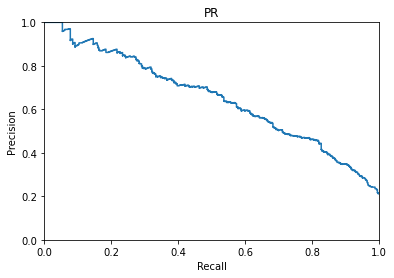

In [44]:
precision, recall, thresholds = precision_recall_curve(target_test, probabilities[:, 1])
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('PR')
plt.show()

По графику PR - модель качественная.

**Исследуем метрику auc_roc**

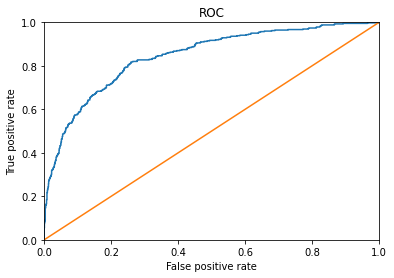

In [45]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:, 1])
plt.figure()
plt.step(fpr, tpr, where='post')
plt.plot([0, 1], [0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC')
plt.show()

По кривой ошибок ROC можно сделать вывод, полученная модель обладает высоким качеством и лучше случайного классификатора.

In [46]:
auc_roc = roc_auc_score(target_test, probabilities[:, 1])
auc_roc

0.8446184888864904

auc_roc > 0.5 следовательно модель качественная.

**Выводы**

- Целевой показатель f1 на тестовой выборке достигнут
- По графику PR - модель качественная.
- По кривой ошибок ROC можно сделать вывод, полученная модель обладает высоким качеством и лучше случайного классификатора.
- auc_roc > 0.5 следовательно модель качественная.

## Общие выводы + Чек-лист готовности проекта

1. Название столбцов приведены к единому виду
2.	Поскольку среди многих пропусков в столбце со сроком пользования банковскими услугами также присутствуют пропуски в столбце с балансом, можно предположить, что клиенты новые, но система их пока не успела отобразить это в данных. Поскольку данное суждение не является абсолютно точным, то для повышения качества модели лучше удалить строки с пропуском.
3.	Для поиска дубликатов все значения таблицы были приведены к нижнему регистру. Дубликатов не обнаружен.
3.	Поскольку количество имён огромное количество, то выявление связи с именем будет неточным. И поскольку множество этих имён встречается по одному разу, то и upsampling может принять ответы являющиеся исключением за правило. В связи с тем, что эти данные нам больше не понядобятся можем их удалить. Это же касается и столбцов с номером строки и customer_id. Удалим их.
4.	Для дальнейшего построения моеделей необходимо преобразовать категориальные столбцы в числовые. Поскольку разные значения одного столбца имеют одинаковое значение, то для преобразования признаков воспользуемся техникой ohe.
5. Данные резделены на тренировочную, валидационную и тестовую в пропорции 60% - 20% - 20%.
6.	Данные стандартизированы. Все они имеют одинаковый разброс
7. Модель случайного леса на сбалансированных данных (методом upsampling) показала прогресс по всем метрикам. Таким образом, до результатов моделей по downsampling наиболее эффективна модель случайного леса с гиперпараметрами: Depth: 18, Estimators: 71
8. Модель случайного леса показала по downsampling результаты хуже чем по upsampling. Таким образом, наиболее эффективна модель случайного леса с гиперпараметрами: Depth: 18, Estimators: 71
9. Целевой показатель f1 на тестовой выборке достигнут
10. По графику PR - модель качественная.
11. По кривой ошибок ROC можно сделать вывод, полученная модель обладает высоким качеством и лучше случайного классификатора.
12. auc_roc > 0.5 следовательно модель качественная.
